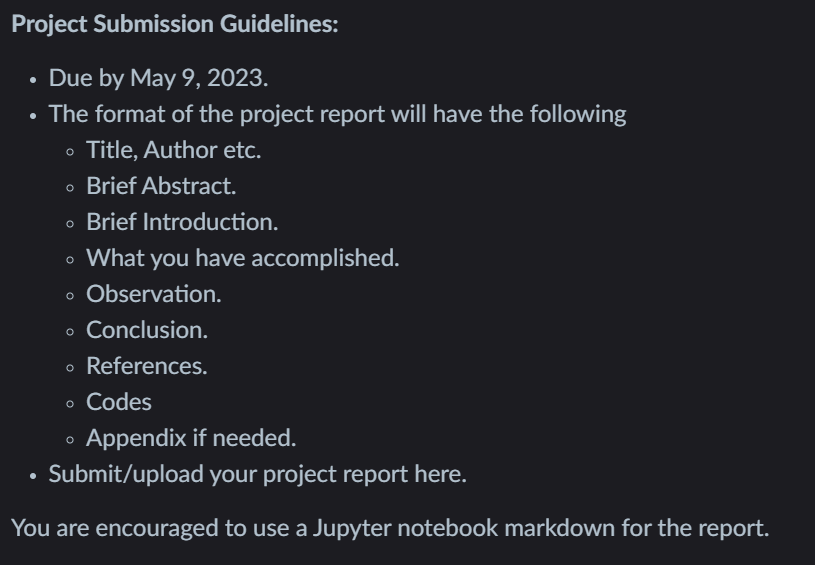

# **American Sign Language Image Translator**

### *By Benjamin Singleton and Omar Abdelmotaleb*

<hr>

#### **Abstract**

In this project, we seek to utilize multiple image classification methods for classifying 28 x 28 resolution images of hand signs to label them with a respective letter. These hand signs are meant to represent a letter in the English language through translation of American Sign Language. The first method we explore is eigensigns, which is our take on the eigenface method using eigen-decomposition on face images but instead on hand sign images. Then, we look at using image centroids, implementing multiple distance calculation methods to find which hand sign is the image closest to, with the hand signs in comparison are the mean images of each label. Next, we use SVD bases, taking the Singular Value Decomposition of the hand signs as well as calculating the residuals to classify which one the hand sign represents the closest. Finally, smoothing is implemented as our last method in an attempt to optimize the performance of our previous models. Overall, we find that some methods are less effective than others in their accuracy of classifying a hand sign to be the correct English letter. Eigensigns and SVD bases yields an accuracy above 80%, while image centroids and our attempted optimization with smoothing yielded no more than 50%.

#### **Introduction**

American Sign Language is a popular means of communication for those who may be deaf or hard of hearing. Utilizing hand signs effectively demonstrates letters in the English language which can be used to construct words and sentences. Translating English words to hand signs is a straightforward task which has been accomplished in numerous ways. However, it's not frequently done the other way around. Translating American Sign Language to English is a more challenging task because it requires methods involving image classification. More importantly, attaining a high accuracy is not as simple and straightforward due to the flaws in existing image classification as well as potentional clarity issues with the images themselves. Translating hand sign images to English serves a purpose in allowing those who are not familiar with ASL to understand or learn from hand signs. This can also help in recording American Sign Language in English for those who want to transcribe it.

#### **What you have accomplished**

Our dataset [Sign Language MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist) was retrieved from Kaggle and read using a pandas dataframe. The training dataset is comrpomised of over 27000 rows and the testing dataset of over 7000 rows. The first header both is the label, which is a numerical value corresponding to a letter in the English alphabet. The remaining 784 columns represent an individual pixel (i.e. pixel1, pixel2, ..., pixel784) of which is a 1-dimensional representation of the 28 x 28 image, able to be displayed once reshaped. Each row will represent an individual image. 

It is important to note with the dataset that the first first label header's numerical values is missing 9 and 25. This is key to understanding why we work with the number 24 a lot despite the English alphabet having 26 letters. As such, the number 8 corresponds to corresponds to "I", the number 9 corresponds to "J", and the number 10 corresponds to "K". Of course, the number 9 and the number 25 corresponding to "Z" will not show up anywhere in the datasets. American Sign Language has hand signs for J and Z, but they are actually hand movements. Since we are working strictly with images, we can not accurately show hand movements, and as such are not included in training or testing.

[Neural Network](#Neural-Network)

As a baseline, we implemented a neural network to classify the images. The classification of handwritten digits using a neural network is a very well researched and developed topic. This is commonly done using the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) and the accuracy of these models has become quite high. The classification of sign language images is a similar problem and so neural networks should provide us with a solid baseline to gauge the performance of our latter models on. We used scikit learn's Multi-Layer Perceptron (MLP) to implement our neural network. To give a brief overview, an MLP is a supervised learning algorithm that is modeled after the human brain. Input data is fed through a series of layers of interconnected nodes. These node represent neurons in the brain and the connections between them. Each layer in the network transforms the values from the previous layer using a weighted linear summation and then applies the result to an activiation function. The general layout of a neural network is displayed below.

<img src="ANN.png" width="40%" height="40%">

A favoriate mathematician of Ben's has a great [series of videos on neural networks](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) if you'd like to learn about them. As mentioned, they work well for the problem of image recognition; however, a drawback of neural networks is that they are black boxes. This means their innerworkings and why they classifiy each image as a given class is unknowable. Just as we can't inspect the neurons in a brain to understand why someone thinks the way they do, we can't inspect a neural network to understand why it classifies a certain way. This provides us with the motivation to explore other methods of classification. The other algorithms we'll employ in this project utilize concepts from numerical linear algebra that we all should be very familar with at this point. As such, how these algorithms classify each image should be much more understanble. 


[Image Centroids](#Image-Centroids)

The centroids method is defined in the textbook as follows:

| Image Centroids classification algorithm |
|------|
|**Training**: Given the manually classified training set, compute the means (centroids) $m_{i}$, i = 0, ... , 8, 10, ... , 24$, of all the 24 classes.|
|**Classification**: For each digit in the test set, classify it as $k$ if $m_{k}$ is the closest mean.|

As the name suggests, the central idea of the algorithm is to find the centroid (mean) of each class of images. When you want to classify a new image, you can use a metric to determine how similar the new each is to each class centroid. You classify the new image as the centroid it is closest to. In the textbook, it suggests using euclidean distance which we implemented. We also implemented several other distance metrics to see if any preformed better than euclidean distance. We choose manhattan distance, pearson correlation coefficient, and Cosine similarity as well.  

[SVD Bases](#SVD-Bases)

The other method defined in the textbook, SVD bases, is defined as follows: 

| SVD Bases classification algorithm |
|------|
|**Training**: For the training set of known images, compute the SVD of each set of images of a label.|
|**Classification**: For a given test image, compute its relative residual in all 24 bases. If one residual is significantly smaller than all the others, classify as that. Otherwise, give up.|

ddd

[Eigensigns](#Eigensigns)

Let $X$ be the training dataset. We compute $\bar{X}$ as the mean of $X$. Then we find the difference of the two as $\hat{X} = X - \bar{X}$ which will act as the mean-adjusted images. Next we construct the covariance matrix by computing 
$$cov = \frac{1}{N}(\hat{X} \cdot \hat{X}^{T})$$
where $N$ is the size of $X$. With the covariance matrix $cov$, we find the eigen-decomposition yielding us the eigenvalues $\lambda$ and the eigenvectors $v$. Afterwards, it's important to sort them and find the top $K$ eigenvectors. We chose $K = 150$. Once that's chosen, we compute the eigensigns themselves as $E = \hat{X}^{T} \cdot v_{sorted}$. We then normalize to get $E_{normal}$. In our project, we went ahead and showed the reconstruction method of it before utilizing a package for the image classification. For the reconstruction, the formula used the testing dataset $y$, giving us 
$$ y_{final} = (((y - \bar{X}) \cdot E_{normal}) \cdot E_{normal}^{T}) + \bar{X} $$ 
For the package, we used sklearn's SVC and PCA methods.


[Smoothing](#Smoothing)

Gaussian smoothing is a method briefly mentioned in our textbook as a way to improve the performance of image classficiation algorithms. Gaussian smoothing, as known as gaussian filtering, involves applying a convolution using a gaussian function to each image. The gaussian function $G(x)$ is defined as 
$$G(x,y) = \frac{1}{2\pi\sigma^{2}}e^{-\frac{x^{2}+y^{2}}{2\sigma^{2}}}$$
where $x$ distance from the origin in the horizontal axis, $y$ is the distance from the origin in the vertical axis, and $\sigma$ is the standard deviation os the gaussian distribution. Applying this function to the image will reduce noise as well as detail. The resulting image will appear blurier as $\sigma$ is increased. At the same time, edges will become more defined. This means the characteristics of each image, such as the arrangement of fingers, may become easier for the algorithms to identity. 


#### **Observations**

Our training dataset is of 27455 rows x 785 columns, including the header row. The first column is the label representing the English letter as a number, excluding 9 and 25 for J and Z. The remaining 784 columns are the pixels, ranging from 0-255, which is a 1D representation of the 28 x 28 images once reshaped to be 2D. In total, it's 27454 black and white images. Our test dataset is of 7172 x 785 columns, including the header row. This follows the same pattern as the training dataset, so 7171 images in total. 

We found Neural Network to serve as basis for a somewhat accurate classification method. The Neural Network we used is an MLP Classifier with hidden layer sizes of 512 and 256. The accuracy it yielded came out to be around 76.3%.



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import files
#from google.colab import drive
from tqdm import tqdm
import io
from sys import maxsize
from sklearn.utils.extmath import randomized_svd
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
import multiprocessing as mp


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
                        
# import tensorflow as tf

In [16]:
# Assessment metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [17]:
import math

In [18]:
from PIL import Image

In [19]:
sign_map = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "J",
    10: "K",
    11: "L",
    12: "M",
    13: "N",
    14: "O",
    15: "P",
    16: "Q",
    17: "R",
    18: "S",
    19: "T",
    20: "U",
    21: "V",
    22: "W",
    23: "X",
    24: "Y",
    25: "Z"
}

In [20]:
reduced_sign_map = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "K",
    10: "L",
    11: "M",
    12: "N",
    13: "O",
    14: "P",
    15: "Q",
    16: "R",
    17: "S",
    18: "T",
    19: "U",
    20: "V",
    21: "W",
    22: "X",
    23: "Y"
}

In [21]:
#df_train = pd.read_csv('/content/drive/MyDrive/sign data/sign_mnist_train/sign_mnist_train.csv')

In [22]:
#df_test = pd.read_csv('/content/drive/MyDrive/sign data/sign_mnist_test/sign_mnist_test.csv')

In [23]:
df_train = pd.read_csv('sign_mnist_train.csv')

In [24]:
df_test = pd.read_csv('sign_mnist_test.csv')

In [25]:
df_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [26]:
df_test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [27]:
def getImageFromTrain(index):
  row = df_train.loc[index].tolist()
  sign = row[0]
  row = row[1:]
  width, height = 28, 28
  img = Image.new("L", (width, height))
  img.putdata(row)
  newsize = (300, 300)
  img = img.resize(newsize)
  img.show()
  print("Sign: ", sign_map[sign])

In [28]:
def getImageFromTest(index):
  row = df_test.loc[index].tolist()
  sign = row[0]
  row = row[1:]
  width, height = 28, 28
  img = Image.new("L", (width, height))
  img.putdata(row)
  newsize = (300, 300)
  img = img.resize(newsize)
  img.show()
  print("Sign: ", sign_map[sign])

In [29]:
def getImage(row):
  print(row)
  sign = row['label']
  print(sign)
  row = row[1:]
  width, height = 28, 28
  img = Image.new("L", (width, height))
  img.putdata(row)
  newsize = (300, 300)
  img = img.resize(newsize)
  img.show()
  print("Sign: ", sign_map[sign])

In [30]:
getImage(df_train.loc[2])

label         2
pixel1      187
pixel2      188
pixel3      188
pixel4      187
           ... 
pixel780    199
pixel781    198
pixel782    195
pixel783    194
pixel784    195
Name: 2, Length: 785, dtype: int64
2
Sign:  C


# Method 0: Neural Network <a id="Neural-Network"></a>

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(512, 256), verbose=True)

In [32]:
x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,:1]
x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,:1]

In [33]:
scaler = MinMaxScaler()

In [34]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [35]:
mlp.fit(x_train, y_train.values.ravel())

Iteration 1, loss = 2.19410689
Iteration 2, loss = 1.19423074
Iteration 3, loss = 0.83479692
Iteration 4, loss = 0.62634750
Iteration 5, loss = 0.44211177
Iteration 6, loss = 0.31687984
Iteration 7, loss = 0.23994791
Iteration 8, loss = 0.16340573
Iteration 9, loss = 0.12917645
Iteration 10, loss = 0.07658654
Iteration 11, loss = 0.05540742
Iteration 12, loss = 0.04778978
Iteration 13, loss = 0.02998012
Iteration 14, loss = 0.03874427
Iteration 15, loss = 0.01871096
Iteration 16, loss = 0.01394533
Iteration 17, loss = 0.01236593
Iteration 18, loss = 0.00982458
Iteration 19, loss = 0.00897333
Iteration 20, loss = 0.00715480
Iteration 21, loss = 0.00683986
Iteration 22, loss = 0.00624607
Iteration 23, loss = 0.00466512
Iteration 24, loss = 0.67230391
Iteration 25, loss = 0.20380635
Iteration 26, loss = 0.08493273
Iteration 27, loss = 0.05622794
Iteration 28, loss = 0.03558376
Iteration 29, loss = 0.02566709
Iteration 30, loss = 0.02055781
Iteration 31, loss = 0.01722786
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(512, 256), verbose=True)

In [36]:
y_pred_ANN = mlp.predict(x_test)

In [37]:
accuracy_score(y_test, y_pred_ANN)

0.7628276631344116

# Method 1: Image Centroids <a id="Image-Centroids"></a>

In [38]:
df_train_A = df_train.loc[df_train['label'] == 0]

In [39]:
df_train.loc[2]

label         2
pixel1      187
pixel2      188
pixel3      188
pixel4      187
           ... 
pixel780    199
pixel781    198
pixel782    195
pixel783    194
pixel784    195
Name: 2, Length: 785, dtype: int64

In [40]:
df_train_A.mean().astype(int)

label         0
pixel1      164
pixel2      165
pixel3      162
pixel4      161
           ... 
pixel780    184
pixel781    182
pixel782    182
pixel783    178
pixel784    174
Length: 785, dtype: int32

The getImage started only working for means when you also convert to type int. I swear it wasn't like this before and I don't know what changed

In [41]:
getImage(df_train_A.mean().astype(int))

label         0
pixel1      164
pixel2      165
pixel3      162
pixel4      161
           ... 
pixel780    184
pixel781    182
pixel782    182
pixel783    178
pixel784    174
Length: 785, dtype: int32
0
Sign:  A


In [42]:
sign_means = []


for i in range(0,26):
  sign_means.append(df_train.loc[df_train['label'] == i].mean())

temp = math.inf
min_index_index = 0
for i in range(0,26):
  if (np.linalg.norm(sign_means[i][1:] - df_test.loc[1][1:]) < temp):
    min_index_index = i
    temp = np.linalg.norm(sign_means[i][1:] - df_test.loc[1][1:])
print(sign_map[min_index_index])

In [43]:
getImageFromTest(1)

Sign:  F


In [44]:
df_train.shape

(27455, 785)

In [45]:
true = df_test.iloc[:,0].tolist()

In [46]:
true = [sign_map[k] for k in true]

In [47]:
df_train.iloc[:,1:]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


Initial, inefficient implementation

In [48]:
class CentroidCompOld:
  def __init__(self):
    self.sign_means = []
    self.signs = 26

  def train(self,X):
    for i in range(0,26):
      self.sign_means.append(X.loc[X['label'] == i].mean())

  def get_centroids(self):
    return self.sign_means

  def predict(self,X):
    y_pred = []
    for index, row in tqdm(X.iterrows(), total=X.shape[0]):
        temp = math.inf
        min_index_index = 0
        for i in range(0,26):
          diff = np.linalg.norm(self.sign_means[i][1:] - X.loc[index][1:])
          if (diff < temp):
            min_index_index = i
            temp = diff
        y_pred.append(sign_map[min_index_index])        
    return y_pred

More efficient implementation. Reading 6 on clustering methods gave us a good set of measures to implement to compare the class means and test data.

In [52]:
class CentroidComp:
  def __init__(self,method="euclid", verbose=False, debug=False):
    self.sign_means = None
    self.method = method
    self.verbose = verbose
    if self.verbose or self.debug:
      print("Initialized centroid class with method " + self.method)

  def train(self,X):
    self.sign_means = X.groupby('label').mean().to_numpy()
    if self.verbose or self.debug:
      print("Trained model")

  def get_centroids(self):
    return self.sign_means

  def predict(self,X):
    y_pred = []
    if self.verbose or self.debug:
      print("Predicting model with " + self.method)

    if (self.method == "euclid"):
      for i in range(len(X)):
        rowi = X.iloc[:,1:].loc[i].to_numpy()
        y_pred.append(reduced_sign_map[np.argmax(np.dot(self.sign_means,rowi) / (np.linalg.norm(self.sign_means, axis=1) * np.linalg.norm(rowi)))])
    
    elif (self.method == "cos"):
      for i in range(len(X)):
        rowi = X.iloc[:,1:].loc[i].to_numpy()
        y_pred.append(reduced_sign_map[np.argmin(np.linalg.norm(self.sign_means - rowi, axis=1))])
    
    elif (self.method == "man"):
      for i in range(len(X)):
        rowi = X.iloc[:,1:].loc[i].to_numpy()
        y_pred.append(reduced_sign_map[np.argmin(np.sum(np.abs(self.sign_means - rowi), axis=1))])

    elif (self.method == "cor"):
      for i in range(len(X)):
        rowi = X.iloc[:,1:].loc[i].to_numpy()
        corr = np.corrcoef(self.sign_means, rowi)
        coefs = corr[:-1, -1]
        y_pred.append(reduced_sign_map[np.argmax(coefs)])

    else:
      return "you messed up"

    return y_pred

In [53]:
euclidModel = CentroidComp(method="euclid", verbose=True)
euclidModel.train(X = df_train)
y_pred_euclid = euclidModel.predict(df_test)
print(classification_report(y_pred_euclid, true))

Initialized centroid class with method euclid
Trained model
Predicting model with euclid
              precision    recall  f1-score   support

           A       0.76      0.56      0.65       448
           B       0.66      0.93      0.77       304
           C       0.61      0.67      0.64       281
           D       0.44      0.47      0.46       232
           E       0.66      0.76      0.71       435
           F       0.56      0.49      0.52       284
           G       0.48      0.51      0.49       329
           H       0.58      0.83      0.68       304
           I       0.24      0.29      0.27       240
           K       0.53      0.30      0.39       575
           L       0.66      0.63      0.64       218
           M       0.18      0.36      0.24       199
           N       0.25      0.37      0.30       196
           O       0.60      0.51      0.55       289
           P       0.82      0.49      0.62       577
           Q       0.83      0.75      0.79   

In [85]:
cosModel = CentroidComp(method="cos", verbose=True)
cosModel.train(X = df_train)
y_pred_cos = cosModel.predict(df_test)
print(classification_report(y_pred_cos, true))

Initialized centroid class with method cos
Trained model
Predicting model with cos
              precision    recall  f1-score   support

           A       0.56      0.58      0.57       323
           B       0.47      0.93      0.63       220
           C       0.53      0.67      0.59       244
           D       0.33      0.53      0.41       150
           E       0.51      0.63      0.56       407
           F       0.30      0.37      0.33       195
           G       0.43      0.52      0.47       290
           H       0.42      0.77      0.54       237
           I       0.36      0.16      0.23       640
           K       0.40      0.26      0.32       499
           L       0.36      0.66      0.46       114
           M       0.11      0.32      0.17       137
           N       0.19      0.42      0.26       132
           O       0.40      0.43      0.42       229
           P       0.80      0.39      0.53       712
           Q       0.58      0.17      0.26       56

In [86]:
manModel = CentroidComp(method="man", verbose=True)
manModel.train(X = df_train)
y_pred_man = manModel.predict(df_test)
print(classification_report(y_pred_man, true))

Initialized centroid class with method man
Trained model
Predicting model with man
              precision    recall  f1-score   support

           A       0.49      0.55      0.51       295
           B       0.31      0.85      0.46       160
           C       0.56      0.65      0.61       268
           D       0.25      0.63      0.36        99
           E       0.47      0.44      0.45       541
           F       0.27      0.25      0.26       263
           G       0.39      0.41      0.40       333
           H       0.33      0.78      0.46       182
           I       0.40      0.14      0.21       789
           K       0.39      0.22      0.28       584
           L       0.33      0.52      0.40       132
           M       0.09      0.41      0.15        85
           N       0.12      0.40      0.18        88
           O       0.36      0.37      0.36       238
           P       0.76      0.42      0.54       628
           Q       0.51      0.20      0.29       41

In [87]:
corModel = CentroidComp(method="cor", verbose=True)
corModel.train(X = df_train)
y_pred_cor = corModel.predict(df_test)
print(classification_report(y_pred_cor, true))

Initialized centroid class with method cor
Trained model
Predicting model with cor
              precision    recall  f1-score   support

           A       0.88      0.58      0.70       502
           B       0.66      0.84      0.74       340
           C       0.60      0.50      0.54       369
           D       0.51      0.43      0.47       287
           E       0.71      0.77      0.74       461
           F       0.58      0.41      0.48       349
           G       0.53      0.42      0.47       436
           H       0.52      0.78      0.62       287
           I       0.21      0.32      0.25       191
           K       0.56      0.31      0.40       603
           L       0.30      0.72      0.42        88
           M       0.10      0.24      0.14       165
           N       0.29      0.44      0.35       193
           O       0.51      0.35      0.42       355
           P       0.93      0.52      0.67       614
           Q       0.74      0.60      0.66       20

Euclid distance and pearson correlation are the best measures at nearly 50% accuracy.

# Method 2: SVD Bases <a id="SVD-Bases"></a>

General

**Training**: For the training set of known signs, compute the SVD of each set of signs of one kind.

**Classification**: For a given test sign, compute its relative residual in all 10 bases. If one residual is significantly smaller than all others, classifiy aas that one.

---

Linear Algebra

**Training**: Compute SVDs of 10 matrices of dimenion m^2 x ni. Each digit is an mxm digitized image. ni is the number of training signs i.

**Classification**: Compute 10 least squares residuals




TO DO
- Experiment with number of bases
- Determine best number of bases for this dataset

In [88]:
train_SVDs = []
letters = df_train.groupby('label')
for name,group in letters:
  letter = group.drop('label', axis=1).values
  train_SVDs.append(np.linalg.svd(letter))

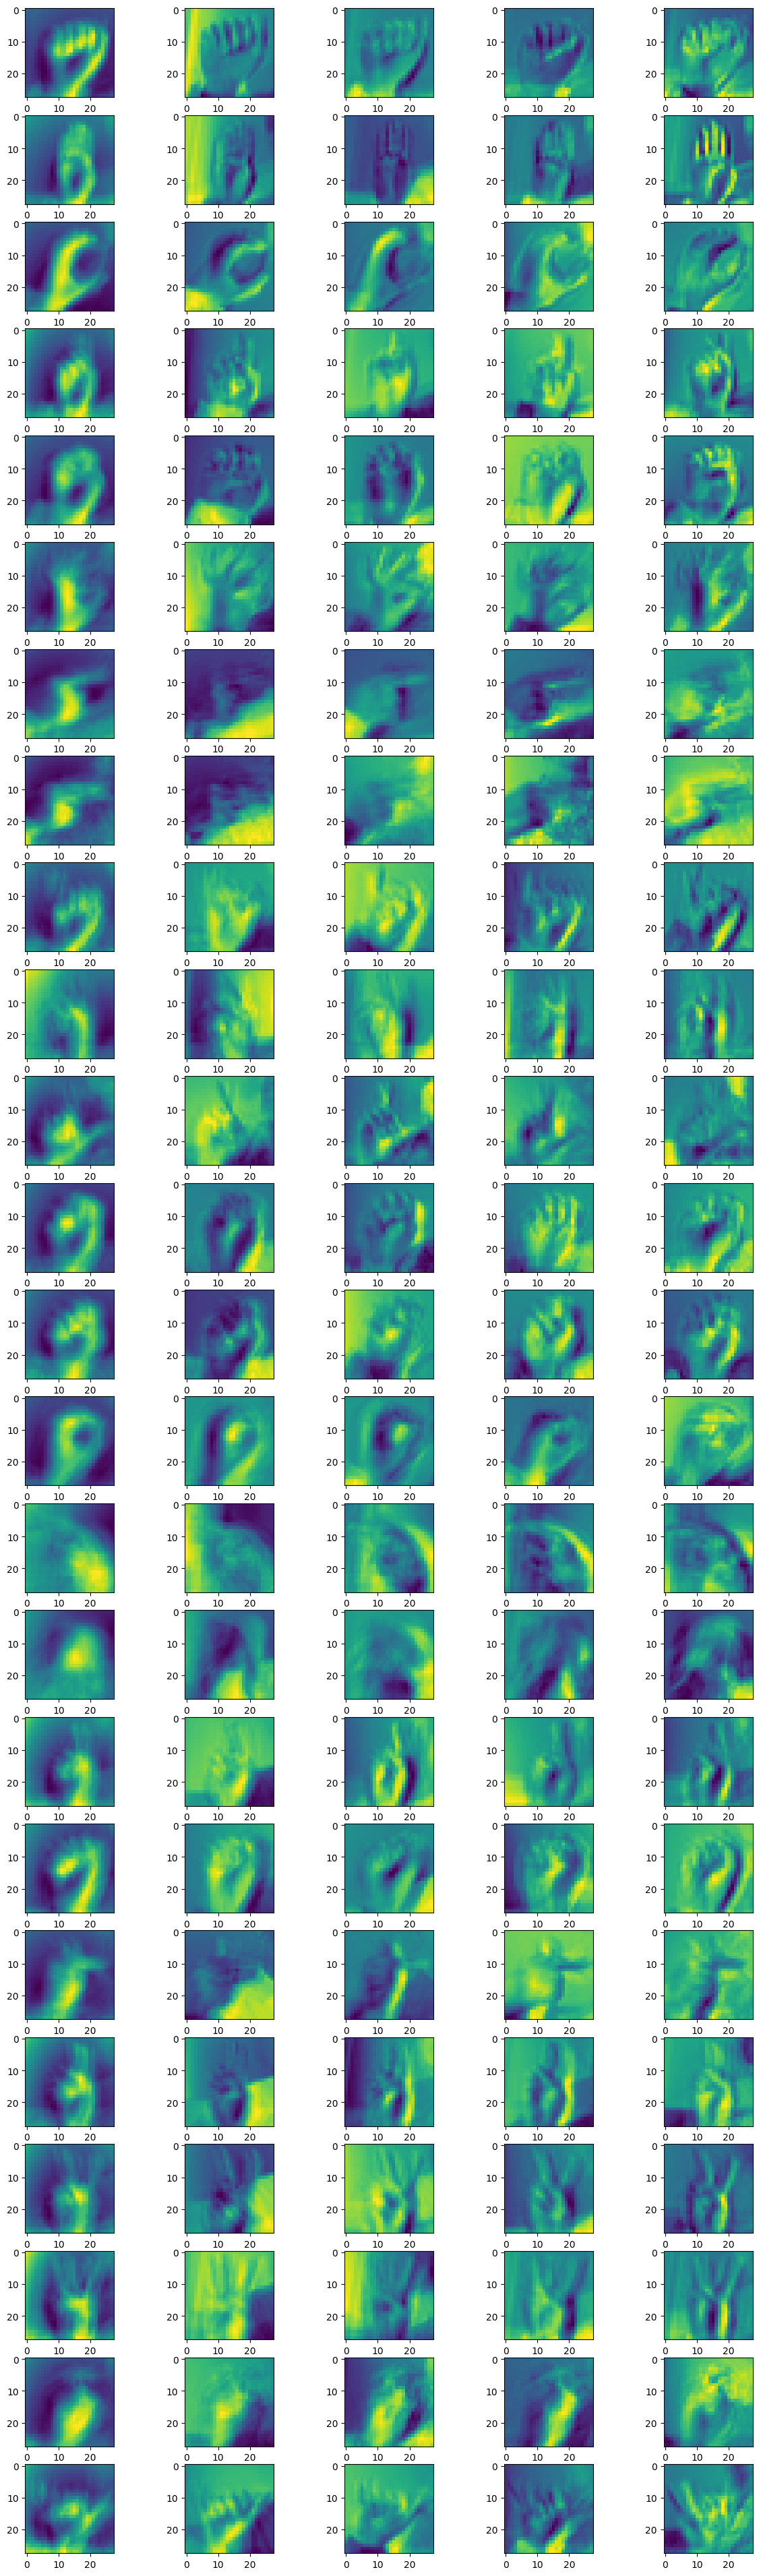

In [89]:
fig = plt.figure(1, figsize = [15, 50], dpi = 100)
c = 1
for j in range(len(reduced_sign_map)):
  for i in range(0,5):
    plt.subplot(24,5,c)
    plt.imshow(train_SVDs[j][2][i:i+1,:].reshape(28,28))
    c = c+1
fig.subplots_adjust(wspace=0.1)
plt.show()

In [90]:
# Randomized SVD as provided in notebook 12
def rSVD(X,r,q,p):
  # Step 1: Sample column space of X with P matrix
  ny = X.shape[1]
  P = np.random.randn(ny,r+p) # Gaussian Random Matrix
  Z = X @ P
  for k in range(q): # Power iteration
      Z = X @ (X.T @ Z)

  Q, R = np.linalg.qr(Z,mode='reduced')

  # Step 2: Compute SVD on projected Y = Q.T @ X
  Y = Q.T @ X
  UY, S, VT = np.linalg.svd(Y,full_matrices=0)
  U = Q @ UY

  return U, S, VT

In [91]:
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import threading

class SVDBases:
    def __init__(self, bases=5, method='SVD', verbose=False):
        self.verbose = verbose
        self.bases = bases
        self.method = method
        self.SVDs = []
        if self.verbose:
            print("Initialized SVD Bases class")

    def train(self,X):
        letters = X.groupby('label')
        for name,group in letters:
            letter = group.drop('label', axis=1).values
            if (self.method=='SVD'):
                U, s, Vt = np.linalg.svd(letter.T)
                self.SVDs.append(U)
            elif (self.method=='rSVD'):
                U, s, Vt = randomized_svd(letter.T, n_components=10, random_state=0)
                self.SVDs.append(U)
            else:
                print('Something went wrong')

    def predict(self, X):
        y_pred = []
        I = np.eye(784)
        uTu = np.array([np.dot(u[:, :self.bases], u[:, :self.bases].T) for u in self.SVDs])
        
        # def worker(i):
        #     z = X.iloc[:,1:].loc[i].to_numpy()
        #     y_pred.append(reduced_sign_map[np.argmin(np.linalg.norm(np.dot((I-uTu),z), axis=1))])
        
        # threads = []
        # with ThreadPoolExecutor(max_workers=1) as executor:
        #     # submit tasks to the executor
        #     futures = [executor.submit(worker, i) for i in range(len(X))]
        #     for future in tqdm(as_completed(futures), total=len(futures)):
        #         result = future.result()    
        
        # for i in range(len(X)):
        #     t = threading.Thread(target=worker, args=(i,))
        #     threads.append(t)
        
        # for i in tqdm(range(len(threads))):
        #     if i == 0:
        #         threads[i].start()
        #     else:
        #         threads[i-1].join()
        #         threads[i].start()
        # for thread in threads:
        #     thread.join()

        for i in tqdm(range(len(X))):
            z = X.iloc[:,1:].loc[i].to_numpy()
                
            y_pred.append(reduced_sign_map[np.argmin(np.linalg.norm(np.dot((I-uTu),z), axis=1))])

            # y_pred.append(reduced_sign_map[np.argmax(np.dot(self.sign_means,rowi) / (np.linalg.norm(self.sign_means, axis=1) * np.linalg.norm(rowi)))])
            '''
            min=maxsize
            index = 0
            for i in range(len(reduced_sign_map)):
                print(np.dot(self.SVDs[i][:, :self.bases], self.SVDs[i][:, :self.bases].T))
                bases = (self.SVDs[i][:, :self.bases])
                diff = np.linalg.norm(np.dot(I-np.dot(bases, bases.T), X.iloc[j, 1:].to_numpy()))
                if (diff < min):
                    min = diff
                    index = i
                break
            break
            y_pred.append(reduced_sign_map[index])
            '''
            
        return y_pred

In [92]:
SVDmodel = SVDBases(verbose=True, method='SVD', bases=20)

Initialized SVD Bases class


In [93]:
SVDmodel.train(df_train)

In [94]:
y_pred = SVDmodel.predict(df_test)

100%|██████████| 7172/7172 [05:22<00:00, 22.27it/s]


In [95]:
accuracy_score(y_pred, true)

0.8453708867819297

In [96]:
SVDmodelB5 = SVDBases(verbose=True, method='SVD', bases=5)
SVDmodelB5.train(df_train)
y_predB5 = SVDmodelB5.predict(df_test)
accuracy_score(y_predB5, true)

Initialized SVD Bases class


100%|██████████| 7172/7172 [05:03<00:00, 23.67it/s]


0.6441717791411042

In [97]:
SVDmodelB10 = SVDBases(verbose=True, method='SVD', bases=10)
SVDmodelB10.train(df_train)
y_predB10 = SVDmodelB10.predict(df_test)
accuracy_score(y_predB10, true)

Initialized SVD Bases class


100%|██████████| 7172/7172 [05:11<00:00, 23.00it/s]


0.8064696040156163

In [98]:
SVDmodelB15 = SVDBases(verbose=True, method='SVD', bases=15)
SVDmodelB15.train(df_train)
y_predB15 = SVDmodelB15.predict(df_test)
accuracy_score(y_predB15, true)

Initialized SVD Bases class


100%|██████████| 7172/7172 [05:15<00:00, 22.72it/s]


0.8339375348577802

In [99]:
SVDmodelB20 = SVDBases(verbose=True, method='SVD', bases=20)
SVDmodelB20.train(df_train)
y_predB20 = SVDmodelB20.predict(df_test)
accuracy_score(y_predB20, true)

Initialized SVD Bases class


100%|██████████| 7172/7172 [05:15<00:00, 22.70it/s]


0.8453708867819297

In [100]:
SVDmodelB25 = SVDBases(verbose=True, method='SVD', bases=25)
SVDmodelB25.train(df_train)
y_predB25 = SVDmodelB25.predict(df_test)
accuracy_score(y_predB25, true)

Initialized SVD Bases class


100%|██████████| 7172/7172 [05:19<00:00, 22.42it/s]


0.8441160066926938

In [101]:
SVDmodelB30 = SVDBases(verbose=True, method='SVD', bases=30)
SVDmodelB30.train(df_train)
y_predB30 = SVDmodelB30.predict(df_test)
accuracy_score(y_predB30, true)

Initialized SVD Bases class


100%|██████████| 7172/7172 [04:59<00:00, 23.97it/s]


0.8326826547685443

Text(0, 0.5, 'Accuracy')

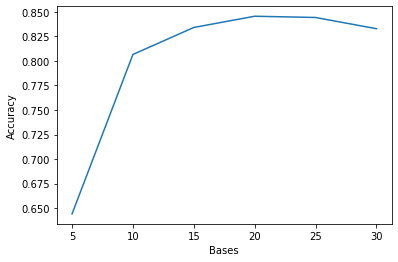

In [102]:
x = [5,10,15,20,25,30]
y = [0.6441717791411042, 0.8064696040156163,0.8339375348577802,0.8453708867819297,0.8441160066926938,0.8326826547685443]
plt.plot(x,y)
plt.xlabel("Bases")
plt.ylabel("Accuracy")

The best accuracy is achieved with around 20 bases, 20/784=~2.5% of the total bases.

In [103]:
uTu = np.array([np.dot(u[:, :20], u[:, :20].T) for u in SVDmodel.SVDs])

In [104]:
uTu

array([[[ 7.19129670e-03,  4.52196944e-03,  3.60780517e-03, ...,
         -1.03601969e-03, -2.27461501e-03, -3.56974713e-03],
        [ 4.52196944e-03,  8.83245430e-03,  9.58501962e-03, ...,
          9.86102163e-04,  8.08700103e-04,  2.58516003e-04],
        [ 3.60780517e-03,  9.58501962e-03,  1.32391753e-02, ...,
          1.94050201e-03,  1.72099215e-03,  5.42853447e-04],
        ...,
        [-1.03601969e-03,  9.86102163e-04,  1.94050201e-03, ...,
          5.15943525e-02,  5.27875617e-02,  5.20806514e-02],
        [-2.27461501e-03,  8.08700103e-04,  1.72099215e-03, ...,
          5.27875617e-02,  5.94579162e-02,  6.22272366e-02],
        [-3.56974713e-03,  2.58516003e-04,  5.42853447e-04, ...,
          5.20806514e-02,  6.22272366e-02,  6.90081298e-02]],

       [[ 1.38476633e-02,  1.22620228e-02,  9.16047197e-03, ...,
          2.31892171e-03,  4.39931395e-04,  1.02553576e-05],
        [ 1.22620228e-02,  1.49804044e-02,  1.04964898e-02, ...,
         -1.30449979e-03, -1.73217268e

In [105]:
I = np.eye(784)

In [106]:
z = df_train.iloc[:,1:].loc[0].to_numpy()

In [107]:
reduced_sign_map[np.argmin(np.linalg.norm(np.dot((I-uTu),z), axis=1))]

'D'

In [108]:
df_train.loc[0]

label         3
pixel1      107
pixel2      118
pixel3      127
pixel4      134
           ... 
pixel780    206
pixel781    206
pixel782    204
pixel783    203
pixel784    202
Name: 0, Length: 785, dtype: int64

In [111]:
# for i in lst:
#     print(np.linalg.norm(i))

In [112]:
df_train.loc[0]

label         3
pixel1      107
pixel2      118
pixel3      127
pixel4      134
           ... 
pixel780    206
pixel781    206
pixel782    204
pixel783    203
pixel784    202
Name: 0, Length: 785, dtype: int64

In [113]:
df_train.shape

(27455, 785)

In [114]:
print(classification_report(y_pred, true))

              precision    recall  f1-score   support

           A       1.00      0.94      0.97       354
           B       0.90      0.92      0.91       423
           C       1.00      0.94      0.97       330
           D       1.00      0.80      0.89       305
           E       0.99      0.90      0.95       549
           F       0.85      0.92      0.88       229
           G       0.94      0.94      0.94       347
           H       0.90      0.99      0.95       396
           I       0.92      0.88      0.90       303
           K       0.82      0.82      0.82       331
           L       0.97      1.00      0.98       202
           M       0.68      0.91      0.78       294
           N       0.84      0.91      0.88       268
           O       0.83      0.83      0.83       247
           P       1.00      1.00      1.00       347
           Q       1.00      0.97      0.98       169
           R       0.58      0.34      0.43       244
           S       0.95    

In [115]:
y_pred[4]

'D'

In [116]:
df_test.loc[4]

label         3
pixel1      188
pixel2      191
pixel3      193
pixel4      195
           ... 
pixel780     46
pixel781     49
pixel782     46
pixel783     46
pixel784     53
Name: 4, Length: 785, dtype: int64

# Method 3: Eigensigns <a id="Eigensigns"></a>

In [ ]:
sample_size = 300
train = df_train.values[:,1:]
train = train[:sample_size,]
test = df_test.values[:,1:]
test = test[:200,]
# Label at index 0
# 784 pixels = 28 x 28
# print(first.reshape(28,28))
first = train[6]    
# plt.imshow(first.reshape(28,28), cmap="gray")
labels = df_train.values[:,0]
print(np.sort(labels))
# sign_train_mean = train.mean(axis=0)
# sign_test_mean = test.mean(axis=0)
# plt.imshow(sign_test_mean.reshape(28,28), cmap="gray")

[ 0  0  0 ... 24 24 24]


In [ ]:
train_mean = train.mean(axis=0)
train_pca = np.subtract(train, train_mean)

example = train_pca[6]
r = np.asarray(example).reshape(28,28)
# plt.imshow(r, cmap="gray")

In [ ]:
train_pca_t = np.transpose(train_pca)
# Y * Y_t / size_train = the covariance matrix
yy_t = np.dot(train_pca, train_pca_t)
n_train, _ = train.shape
cov = np.divide(yy_t, n_train)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [ ]:
# Top K = 150 eigensigns computed
K = 150

eigenvalues_index_sorted = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted       = eigenvalues[eigenvalues_index_sorted][0:K]
# eigenvectors_sorted    = eigenvectors[:, eigenvalues_index_sorted]
eigenvectors_sorted      = eigenvectors[:,eigenvalues_index_sorted][:,0:K]


In [ ]:
eigensigns = np.dot(train_pca_t, eigenvectors_sorted)

In [ ]:
eigensigns_normal = eigensigns / np.linalg.norm(eigensigns, axis=0)

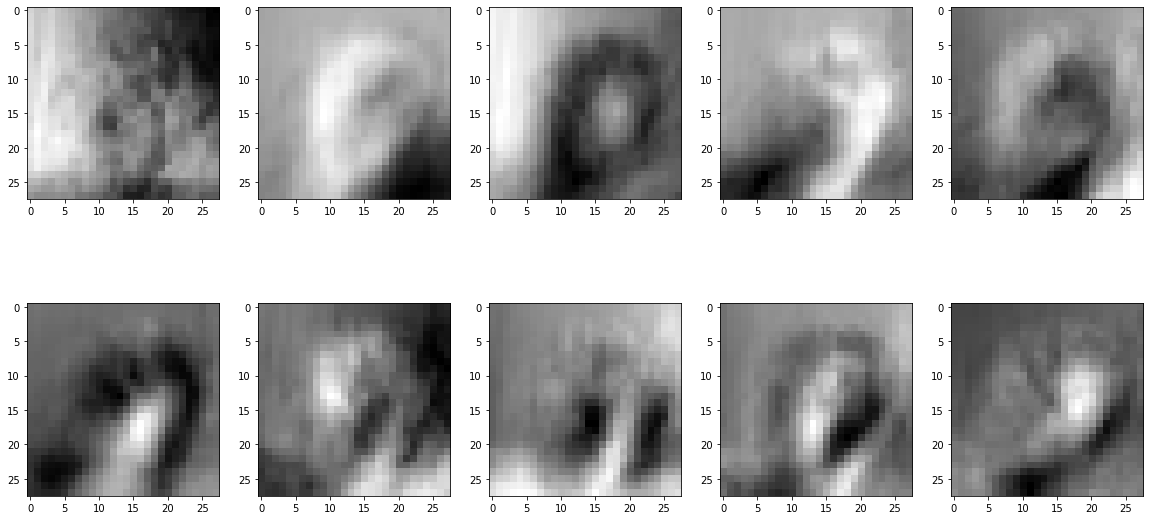

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i in range(10):
    v = eigensigns_normal[:, i]
    r = np.asarray(v).reshape(28, 28)
    fig.add_subplot(2, 5, i + 1)
    plt.imshow(r, cmap='gray')

plt.savefig(f"eigensign_figures/K={K}_eigensign.pdf")

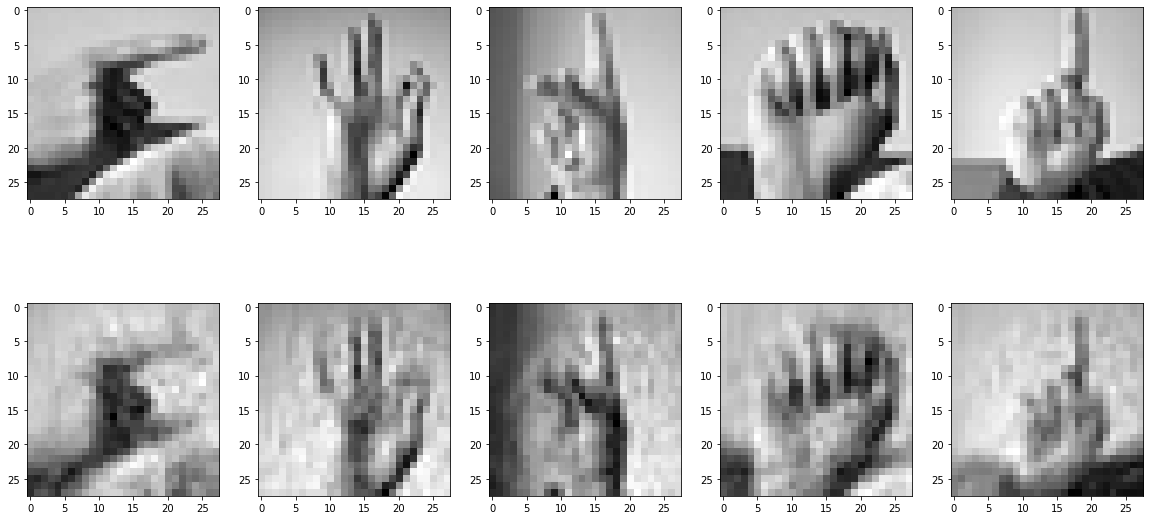

In [ ]:
eigensigns_normal_k_t = np.transpose(eigensigns_normal)

# test_t      = test          - train_mean
# test_t_e    = test_t        @ eigensigns_normal
# test_t_e_et = test_t_e      @ eigensigns_normal_k_t
# test_final  = test_t_e_et   + train_mean

test_final = (((test - train_mean) @ eigensigns_normal) @ eigensigns_normal_k_t) + train_mean

fig_r = plt.figure(figsize=(20, 10))
i = 1

for v in test:
    r = np.asarray(v).reshape(28, 28)
    fig_r.add_subplot(2, 5, i)
    i += 1
    plt.imshow(r, cmap="gray")
    if i > 5:
        break

for v in test_final:
    r = np.asarray(v).reshape(28, 28)
    fig_r.add_subplot(2, 5, i)
    i += 1
    plt.imshow(r, cmap="gray")
    if i > 10:
        break

plt.savefig(f"eigensign_figures/K={K}_test_vs_reconstructed.pdf")

Label:  0


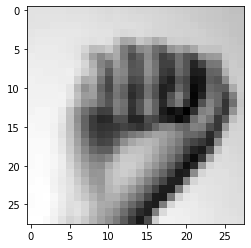

In [ ]:
test_image_A = Image.open("test_images/A.jpg")
test_image_B = Image.open("test_images/B.jpg")
test_image_L = Image.open("test_images/L.jpg")

test_image_A = np.array(test_image_A.convert("L"))
test_image_B = np.array(test_image_B.convert("L"))
test_image_L = np.array(test_image_L.convert("L"))


test_image_A_1D = test_image_A.ravel()
test_image_B_1D = test_image_B.ravel()
test_image_L_1D = test_image_L.ravel()

def ops(test_img):
    return (((test_img - train_mean) @ eigensigns_normal) @ eigensigns_normal_k_t) + train_mean

test_image_A_final = ops(test_image_A_1D)
test_image_B_final = ops(test_image_B_1D)
test_image_L_final = ops(test_image_L_1D)


distances = np.sqrt(np.sum((df_test.values[:,1:] - test_image_A_final)**2, axis=1))

# Find the index of the row with the smallest distance
min_idx = np.argmin(distances)

closest_image = df_test.values[:,1:][min_idx].reshape((28, 28))

print("Label: ", df_test.values[:,0][min_idx])
# plt.imshow(test_image_A_final.reshape(28,28), cmap="gray")
# plt.imshow(test_image_B_final.reshape(28,28), cmap="gray")
# plt.imshow(test_image_L_final.reshape(28,28), cmap="gray")
plt.imshow(closest_image, cmap="gray")

# for t in test_final:
#     print(t.shape)
#     break

Using existing packages to accomplish classification

In [ ]:
eigensigns_X = df_train.drop("label", axis=1).values
eigensigns_y = df_train["label"].values

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(eigensigns_X, eigensigns_y)
X_train = df_train.drop('label',axis=1).values
y_train = df_train['label'].values
X_test = df_test.drop('label',axis=1).values
y_test = df_test['label'].values
eigensigns_pca = PCA(n_components=50).fit(X_train) # 672 in total

In [ ]:
X_train_pca = eigensigns_pca.transform(X_train)

In [ ]:
classifier = SVC().fit(X_train_pca, y_train)

In [ ]:
X_test_pca = eigensigns_pca.transform(X_test)
predictions = classifier.predict(X_test_pca)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      1.00      1.00       432
           2       0.87      0.99      0.93       310
           3       0.91      1.00      0.95       245
           4       0.96      1.00      0.98       498
           5       0.89      0.90      0.89       247
           6       0.97      0.90      0.93       348
           7       0.97      0.97      0.97       436
           8       0.78      0.91      0.84       288
          10       0.84      0.62      0.71       331
          11       0.89      1.00      0.94       209
          12       0.90      0.77      0.83       394
          13       0.90      0.75      0.82       291
          14       1.00      0.93      0.96       246
          15       1.00      1.00      1.00       347
          16       0.98      1.00      0.99       164
          17       0.40      0.68      0.51       144
          18       0.77    

# Method 4: Smoothing <a id="Smoothing"></a>

At the end of chapter 10, Elden recommends image smoothing as a way to improve performance. We attempted to apply some smoothing methods to improve the performance of the models we've made.

In [117]:
images = df_train.iloc[:,1:].values.reshape(-1, 28, 28)

In [118]:
filtered_images = np.zeros_like(images)
for i in range(len(images)):
    filtered_images[i] = gaussian_filter(images[i], sigma=1)

In [119]:
filtered_data = filtered_images.reshape(-1, 784)

In [120]:
filtered_df_train = pd.DataFrame(filtered_data)

In [121]:
filtered_df_train.insert(0, 'label', df_train['label'])

In [122]:
filtered_df_train.columns

Index(['label',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           774,     775,     776,     777,     778,     779,     780,     781,
           782,     783],
      dtype='object', length=785)

In [123]:
getImage(filtered_df_train.loc[1])

label      6
0        156
1        156
2        156
3        157
        ... 
779      131
780      134
781      123
782      122
783      129
Name: 1, Length: 785, dtype: int64
6
Sign:  G


In [124]:
model3 = CentroidComp(method="cor", verbose=True)

Initialized centroid class with method cor


In [125]:
model3.train(X = filtered_df_train)

Trained model


In [126]:
y_pred3 = model3.predict(df_test)

Predicting model with cor


In [127]:
accuracy_score(y_pred3, true)

0.45984383714445065

In [128]:
def smooth_row(row):
    smoothed_row = gaussian_filter1d(row, sigma=1)
    return pd.Series(smoothed_row, index=row.index)

In [129]:
smoothed_df_train = df_train.apply(smooth_row, axis=1)

In [130]:
smoothed_df_train['label'] = df_train['label']

In [131]:
smoothed_df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,80,111,125,133,138,142,146,149,152,...,206,206,206,206,206,205,205,204,203,202
1,6,111,147,155,156,156,156,156,157,157,...,99,117,118,106,115,141,147,134,133,142
2,2,132,176,186,187,186,186,186,187,186,...,202,201,200,199,198,198,197,195,194,194
3,2,149,199,210,211,211,210,210,210,210,...,234,233,232,231,229,226,224,221,207,186
4,13,120,158,169,172,175,178,180,183,184,...,91,100,106,116,134,151,158,162,167,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,136,179,189,190,191,192,192,193,193,...,127,131,109,88,107,165,206,214,218,222
27451,23,114,146,155,158,159,161,162,164,165,...,198,198,197,197,197,196,195,195,194,194
27452,18,127,164,173,174,174,174,174,173,173,...,132,174,200,206,205,204,203,201,200,200
27453,17,131,171,182,185,186,188,189,190,190,...,108,70,51,62,78,74,64,68,81,89


In [132]:
getImage(smoothed_df_train.loc[0])

label         3
pixel1       80
pixel2      111
pixel3      125
pixel4      133
           ... 
pixel780    205
pixel781    205
pixel782    204
pixel783    203
pixel784    202
Name: 0, Length: 785, dtype: int64
3
Sign:  D


### Works Cited

Eldén, Lars. Matrix Methods in Data Mining and Pattern Recognition. Society for Industrial and Applied Mathematics, 2007. 